In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics 
from sklearn.svm import SVC 
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 9999

In [60]:
filepath = 'C:/Users/OFFICE/Data_visualization/Calories Burnt Prediction using Machine Learning/Calories.csv'
Calories = pd.read_csv(filepath)

In [61]:
Calories

,date,steps,distance,runDistance,calories
0,2016-04-27,4948,3242,46,281
1,2016-04-28,16573,12060,79,751
2,2016-04-29,18002,12916,29,737
3,2016-04-30,4126,2981,11,207
4,2016-05-01,3869,2651,0,244
5,2016-05-02,10004,7330,0,426
6,2016-05-03,14565,11022,55,616
7,2016-05-04,6295,4341,0,315
8,2016-05-05,12424,10207,2968,587
9,2016-05-06,7964,5736,209,345


In [62]:
Calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         2454 non-null   object
 1   steps        2454 non-null   int64 
 2   distance     2454 non-null   int64 
 3   runDistance  2454 non-null   int64 
 4   calories     2454 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 96.0+ KB


In [63]:
Calories.describe()

,steps,distance,runDistance,calories
count,2454.000000,2454.000000,2454.000000,2454.000000
mean,8262.905460,5955.612469,826.986553,240.008150
std,6666.920001,4872.125039,1826.378002,213.678332
min,0.000000,0.000000,0.000000,0.000000
25%,3225.000000,2227.000000,153.000000,90.000000
50%,6983.000000,5010.000000,296.000000,190.000000
75%,11046.000000,7994.000000,600.000000,308.750000
max,38443.000000,29485.000000,21952.000000,2543.000000


# Exploratory Data Analysis

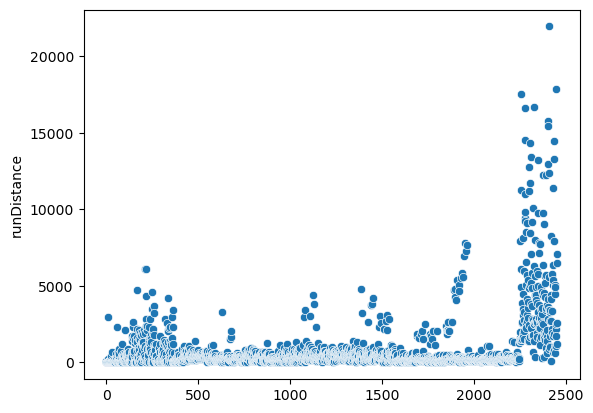

In [64]:
sns.scatterplot(Calories['runDistance']) 
plt.show()

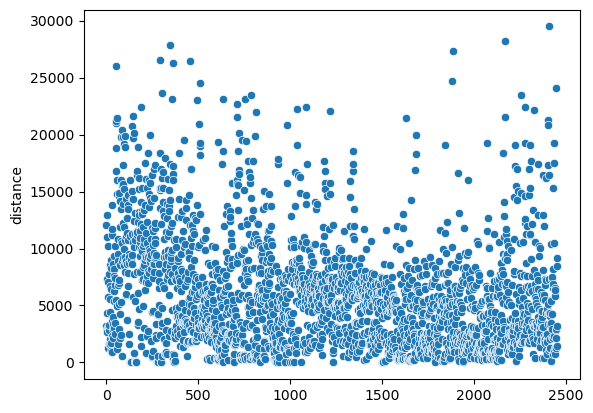

In [65]:
sns.scatterplot(Calories['distance']) 
plt.show()

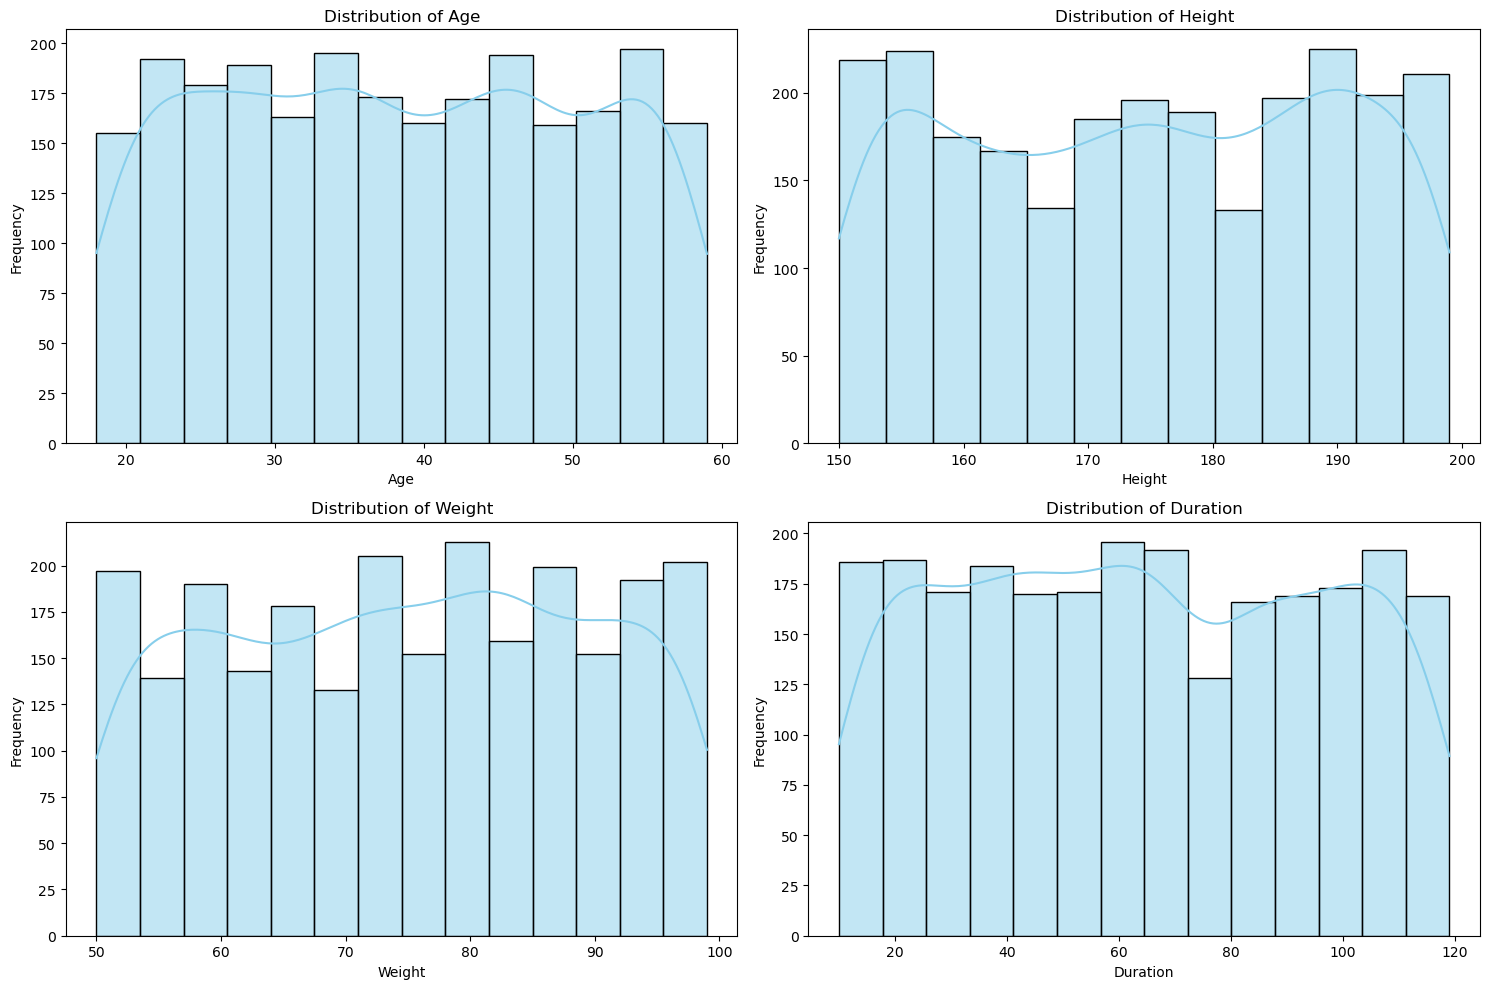

In [52]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(Calories[col], kde=True, color = 'skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

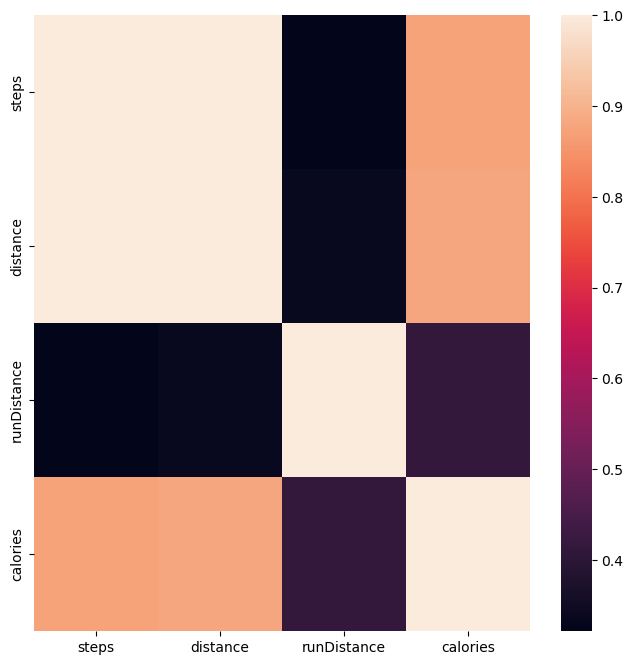

In [67]:
plt.figure(figsize=(8,8))
sns.heatmap( Calories.corr())
plt.show()

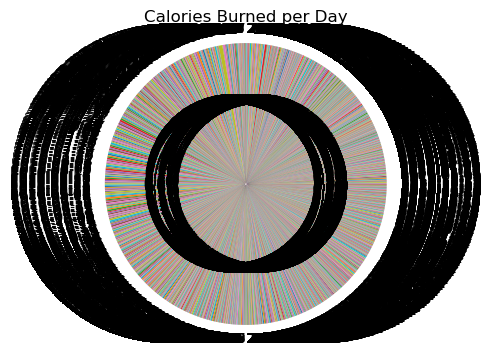

In [68]:
Calories_by_date = Calories.groupby('date')['calories'].sum()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(Calories_by_date, labels=Calories_by_date.index, autopct='%1.1f%%', startangle=140)
plt.title('Calories Burned per Day')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

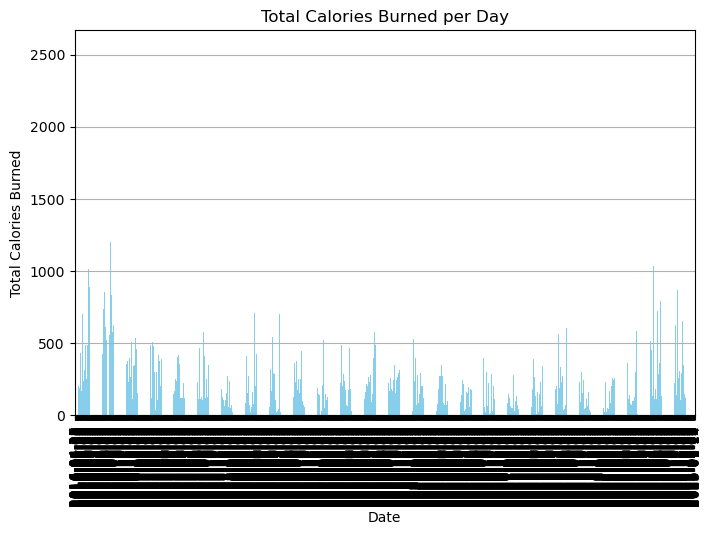

In [69]:
# Create the bar plot
plt.figure(figsize=(8, 5))
Calories_by_date.plot(kind='bar', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Total Calories Burned')
plt.title('Total Calories Burned per Day')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Display the bar plot
plt.show()

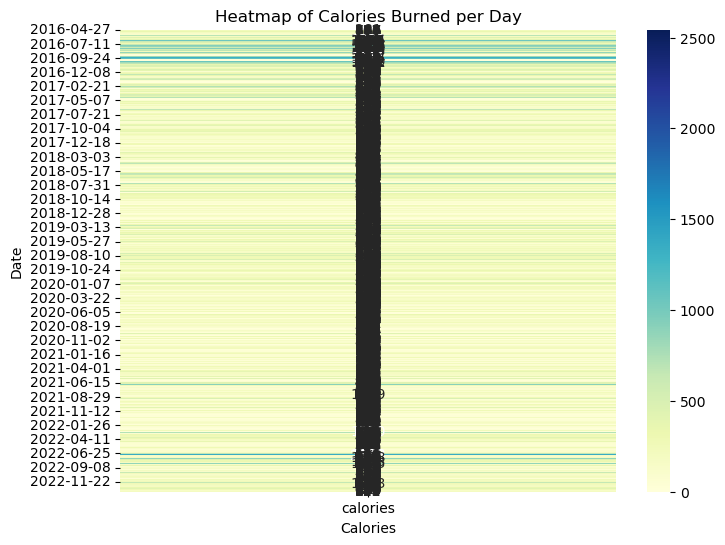

In [70]:
# Create a pivot table to structure the data for a heatmap
pivot_table = Calories.pivot_table(values='calories', index='date', fill_value=0)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Heatmap of Calories Burned per Day')
plt.xlabel('Calories')
plt.ylabel('Date')

# Display the heatmap
plt.show()

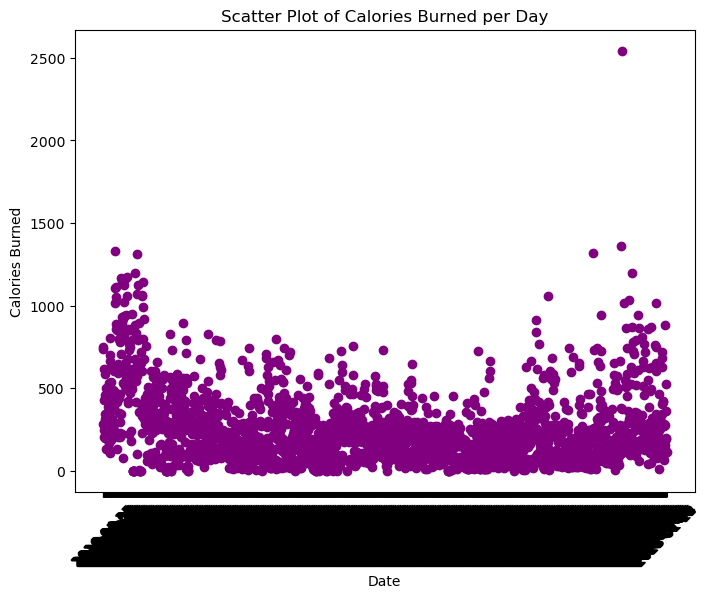

In [71]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Calories['date'], Calories['calories'], color='purple')
plt.xlabel('Date')
plt.ylabel('Calories Burned')
plt.title('Scatter Plot of Calories Burned per Day')
plt.xticks(rotation=45)
# plt.grid(True)

# Display the scatter plot
plt.show()


# Spliting Data

In [72]:
remove = ['date']
Calories.drop(remove, axis=1,inplace=True)

In [73]:
Calories

,steps,distance,runDistance,calories
0,4948,3242,46,281
1,16573,12060,79,751
2,18002,12916,29,737
3,4126,2981,11,207
4,3869,2651,0,244
5,10004,7330,0,426
6,14565,11022,55,616
7,6295,4341,0,315
8,12424,10207,2968,587
9,7964,5736,209,345


In [74]:
features = Calories.drop(['calories'], axis=1) 
target = Calories['calories'].values 

# Training Data

In [76]:
X_train, X_val,Y_train, Y_val = train_test_split(features, target, test_size=0.1,  random_state=22) 

In [77]:
X_train.shape

(2208, 3)

In [78]:
X_val.shape

(246, 3)

In [79]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val) 

# LinearRegression

In [100]:
from sklearn.metrics import mean_squared_error, r2_score
Linear = LinearRegression()
Linear.fit(X_train,Y_train)
predict=Linear.predict(X_val)

In [101]:
mse = mean_squared_error(Y_val, predict)
r2 = r2_score(Y_val, predict)

In [102]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Model Coefficients:", Linear.coef_)
print("Model Intercept:", Linear.intercept_)

Mean Squared Error: 9445.384225018384
R-squared: 0.8034713990660189
Model Coefficients: [-94.35924461 271.76457738  27.82973611]
Model Intercept: 241.01902173913044


# XGBRegressor

In [103]:
from sklearn.metrics import accuracy_score 
XGB = XGBRegressor()
XGB.fit(X_train,Y_train)
predict = XGB.predict(X_val)

In [104]:
mse = mean_squared_error(Y_val, predict)
r2 = r2_score(Y_val, predict)

In [105]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Model Coefficients:", Linear.coef_)
print("Model Intercept:", Linear.intercept_)

Mean Squared Error: 9849.976266244472
R-squared: 0.7950531244277954
Model Coefficients: [-94.35924461 271.76457738  27.82973611]
Model Intercept: 241.01902173913044


# Lasso

In [106]:
lasso = Lasso()
lasso.fit(X_train,Y_train)
predict = lasso.predict(X_val)

In [107]:
mse = mean_squared_error(Y_val, predict)
r2 = r2_score(Y_val, predict)

In [108]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Model Coefficients:", Linear.coef_)
print("Model Intercept:", Linear.intercept_)

Mean Squared Error: 9347.071595497751
R-squared: 0.8055169742457616
Model Coefficients: [-94.35924461 271.76457738  27.82973611]
Model Intercept: 241.01902173913044


# RandomForestRegressor

In [109]:
random = RandomForestRegressor()
random.fit(X_train,Y_train)
predict = random.predict(X_val)

In [110]:
mse = mean_squared_error(Y_val, predict)
r2 = r2_score(Y_val, predict)

In [111]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Model Coefficients:", Linear.coef_)
print("Model Intercept:", Linear.intercept_)

Mean Squared Error: 8840.25752926829
R-squared: 0.8160621735724247
Model Coefficients: [-94.35924461 271.76457738  27.82973611]
Model Intercept: 241.01902173913044


#  Ridge

In [112]:
rid =  Ridge()
rid.fit(X_train,Y_train)
predict = rid.predict(X_val)

In [113]:
mse = mean_squared_error(Y_val, predict)
r2 = r2_score(Y_val, predict)

In [114]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Model Coefficients:", Linear.coef_)
print("Model Intercept:", Linear.intercept_)

Mean Squared Error: 9407.23672019261
R-squared: 0.8042651281059319
Model Coefficients: [-94.35924461 271.76457738  27.82973611]
Model Intercept: 241.01902173913044
